In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)

dataset_train

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
#extra
len(dataset_train)

2035

In [4]:
#extracting 1st index column (open) using iloc 
#we can also extract rows using iloc
training_set = dataset_train.iloc[:, 1:2].values

training_set #open price

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [5]:
#extra
len(training_set)

2035

In [6]:
#scaling is of 3 trypes (notes)

#scaling open price using sklearn
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
len(training_set_scaled)

2035

In [8]:
len(training_set_scaled[0])

1

In [ ]:
#Incorporating Timesteps Into Data
#We should input our data in the form of a 3D array to the LSTM model.
#First, we create data in 60 timesteps before using numpy to convert it into an array. 
#Finally, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [10]:
X_train = []
y_train = []

#traversing from i=60 to i=2035
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
2035-60

1975

In [11]:
len(X_train)

1975

In [12]:
len(X_train[0])

60

In [13]:
X_train

array([[0.6202352 , 0.62226277, 0.64436334, ..., 0.79622871, 0.81062449,
        0.74371452],
       [0.62226277, 0.64436334, 0.61719384, ..., 0.81062449, 0.74371452,
        0.77007299],
       [0.64436334, 0.61719384, 0.61820762, ..., 0.74371452, 0.77007299,
        0.73641525],
       ...,
       [0.19870235, 0.21796431, 0.21553122, ..., 0.14963504, 0.14801298,
        0.15815085],
       [0.21796431, 0.21553122, 0.20600162, ..., 0.14801298, 0.15815085,
        0.16504461],
       [0.21553122, 0.20600162, 0.21654501, ..., 0.15815085, 0.16504461,
        0.15896188]])

In [14]:
X_train[0]

array([0.6202352 , 0.62226277, 0.64436334, 0.61719384, 0.61820762,
       0.62408759, 0.62793998, 0.63584753, 0.61658556, 0.57725061,
       0.54845904, 0.57339822, 0.57339822, 0.56731549, 0.57948094,
       0.57137064, 0.63706407, 0.62814274, 0.63219789, 0.62550689,
       0.61942417, 0.63219789, 0.61111111, 0.62206002, 0.64557989,
       0.67234388, 0.66058394, 0.64760746, 0.6283455 , 0.62408759,
       0.61597729, 0.63341444, 0.63077859, 0.63321168, 0.64841849,
       0.62469586, 0.62814274, 0.61394972, 0.67964315, 0.65815085,
       0.6593674 , 0.64841849, 0.62773723, 0.67883212, 0.66058394,
       0.63990268, 0.60888078, 0.6431468 , 0.6784266 , 0.65064882,
       0.71695053, 0.74574209, 0.7676399 , 0.78548256, 0.78994323,
       0.75892133, 0.76520681, 0.79622871, 0.81062449, 0.74371452])

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
len(X_train)

1975

In [17]:
len(X_train[0])

60

In [18]:
X_train

array([[[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.79622871],
        [0.81062449],
        [0.74371452]],

       [[0.62226277],
        [0.64436334],
        [0.61719384],
        ...,
        [0.81062449],
        [0.74371452],
        [0.77007299]],

       [[0.64436334],
        [0.61719384],
        [0.61820762],
        ...,
        [0.74371452],
        [0.77007299],
        [0.73641525]],

       ...,

       [[0.19870235],
        [0.21796431],
        [0.21553122],
        ...,
        [0.14963504],
        [0.14801298],
        [0.15815085]],

       [[0.21796431],
        [0.21553122],
        [0.20600162],
        ...,
        [0.14801298],
        [0.15815085],
        [0.16504461]],

       [[0.21553122],
        [0.20600162],
        [0.21654501],
        ...,
        [0.15815085],
        [0.16504461],
        [0.15896188]]])

In [19]:
X_train[0]

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       [0.61719384],
       [0.61820762],
       [0.62408759],
       [0.62793998],
       [0.63584753],
       [0.61658556],
       [0.57725061],
       [0.54845904],
       [0.57339822],
       [0.57339822],
       [0.56731549],
       [0.57948094],
       [0.57137064],
       [0.63706407],
       [0.62814274],
       [0.63219789],
       [0.62550689],
       [0.61942417],
       [0.63219789],
       [0.61111111],
       [0.62206002],
       [0.64557989],
       [0.67234388],
       [0.66058394],
       [0.64760746],
       [0.6283455 ],
       [0.62408759],
       [0.61597729],
       [0.63341444],
       [0.63077859],
       [0.63321168],
       [0.64841849],
       [0.62469586],
       [0.62814274],
       [0.61394972],
       [0.67964315],
       [0.65815085],
       [0.6593674 ],
       [0.64841849],
       [0.62773723],
       [0.67883212],
       [0.66058394],
       [0.63990268],
       [0.60888078],
       [0.643

In [20]:
len(y_train)

1975

In [21]:
y_train

array([0.77007299, 0.73641525, 0.73763179, ..., 0.16504461, 0.15896188,
       0.16626115])

In [23]:
#creating lstm model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [24]:
model = Sequential() #to tell that we are working on a sequential model like LSTM

#adding layers
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

Epoch 1/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0106
Epoch 2/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0032
Epoch 3/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0027
Epoch 4/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0025
Epoch 5/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0023
Epoch 6/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0025
Epoch 7/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0024
Epoch 8/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0021
Epoch 9/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0020
Epoch 10/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0018
Epoch 11/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0018
Epoch 12/100
1975/1975 [==============================] - 5s 2ms/step - l

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

In [25]:
#test set
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [26]:
len(real_stock_price)

16

In [27]:
len(real_stock_price[0])

1

In [28]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [38]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

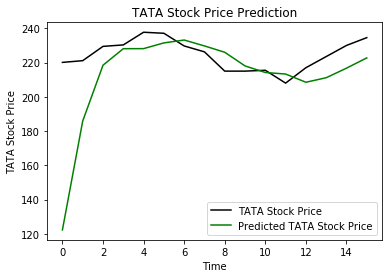

In [39]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()